[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter the year (e.g., 2023): 2020

📅 Sentiment Distribution by Month in 2020
Sentiment  Average   Bad  Good
Month                         
January        536  1872  2432
February       502  1896  2178
March          329  1349  1516
April          127   473   758
May            165   608   835
June           183   793   824
July           194   842   823
August         282  1262  1188
September      306  1268  1209
October        330  1450  1374
November       327  1524  1303
December       499  1790  1880


😃  Good Reviews:     16320
😐  Average Reviews:  3780
😡  Bad Reviews:      15127




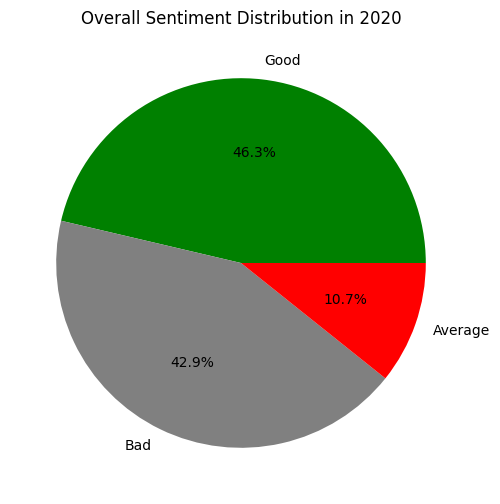

<Figure size 1200x600 with 0 Axes>

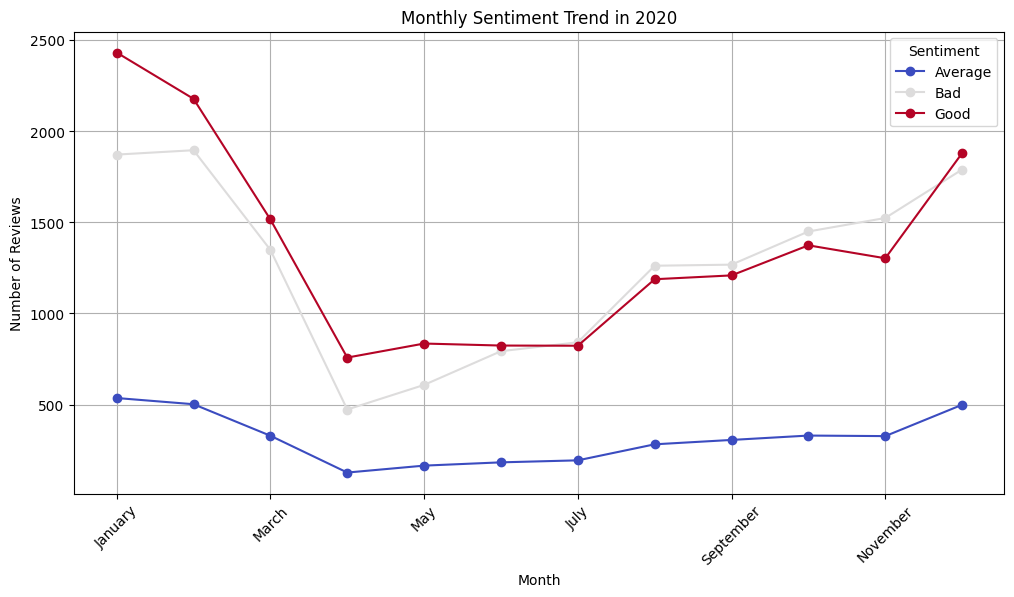

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("swiggy.csv")

# Convert review_date to datetime format
df["review_date"] = pd.to_datetime(df["review_date"], errors="coerce")

# Extract Year and Month
df["Year"] = df["review_date"].dt.year
df["Month"] = df["review_date"].dt.strftime("%B")  # Get month names

# Download VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    if pd.isna(text):  # Handle missing values
        return "Average"  # Neutral = Average

    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Good"  # Positive
    elif score <= -0.05:
        return "Bad"  # Negative
    else:
        return "Average"  # Neutral

# Apply sentiment analysis
df["Sentiment"] = df["review_description"].apply(get_sentiment)

# User input for year
year = int(input("Enter the year (e.g., 2023): "))

# Filter data for the selected year
df_year = df[df["Year"] == year]

# Group sentiment counts by month
sentiment_monthly = df_year.groupby(["Month", "Sentiment"]).size().unstack()

# Sort months in calendar order
month_order = ["January", "February", "March", "April", "May", "June", "July",
               "August", "September", "October", "November", "December"]
sentiment_monthly = sentiment_monthly.reindex(month_order)

# Display monthly sentiment counts
print("\n📅 Sentiment Distribution by Month in", year)
print(sentiment_monthly)

# ----- PRINT SENTIMENT COUNTS WITH BIG EMOJIS -----
sentiment_counts = df_year["Sentiment"].value_counts()

print("\n")
print("😃  Good Reviews:".ljust(20), sentiment_counts.get("Good", 0))
print("😐  Average Reviews:".ljust(20), sentiment_counts.get("Average", 0))
print("😡  Bad Reviews:".ljust(20), sentiment_counts.get("Bad", 0))
print("\n")

# ----- PIE CHART -----
plt.figure(figsize=(6, 6))
df_year["Sentiment"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["green", "gray", "red"])
plt.title(f"Overall Sentiment Distribution in {year}")
plt.ylabel("")  # Hide y-label
plt.show()

# ----- LINE GRAPH -----
plt.figure(figsize=(12, 6))
sentiment_monthly.plot(kind="line", marker="o", colormap="coolwarm", figsize=(12, 6))

plt.title(f"Monthly Sentiment Trend in {year}")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



📅 Sentiment Distribution by Year
Sentiment  Average    Bad   Good
Year                            
2018          1026   3392   5672
2019          6782  21840  32624
2020          3780  15127  16320
2021          4678  17404  20683
2022          2575  12667   9154
2023          3850  13684   9533

📊 Sentiment Count by Year:

📅 2018
😃  Good Reviews:     5672
😐  Average Reviews:  1026
😡  Bad Reviews:      3392

📅 2019
😃  Good Reviews:     32624
😐  Average Reviews:  6782
😡  Bad Reviews:      21840

📅 2020
😃  Good Reviews:     16320
😐  Average Reviews:  3780
😡  Bad Reviews:      15127

📅 2021
😃  Good Reviews:     20683
😐  Average Reviews:  4678
😡  Bad Reviews:      17404

📅 2022
😃  Good Reviews:     9154
😐  Average Reviews:  2575
😡  Bad Reviews:      12667

📅 2023
😃  Good Reviews:     9533
😐  Average Reviews:  3850
😡  Bad Reviews:      13684


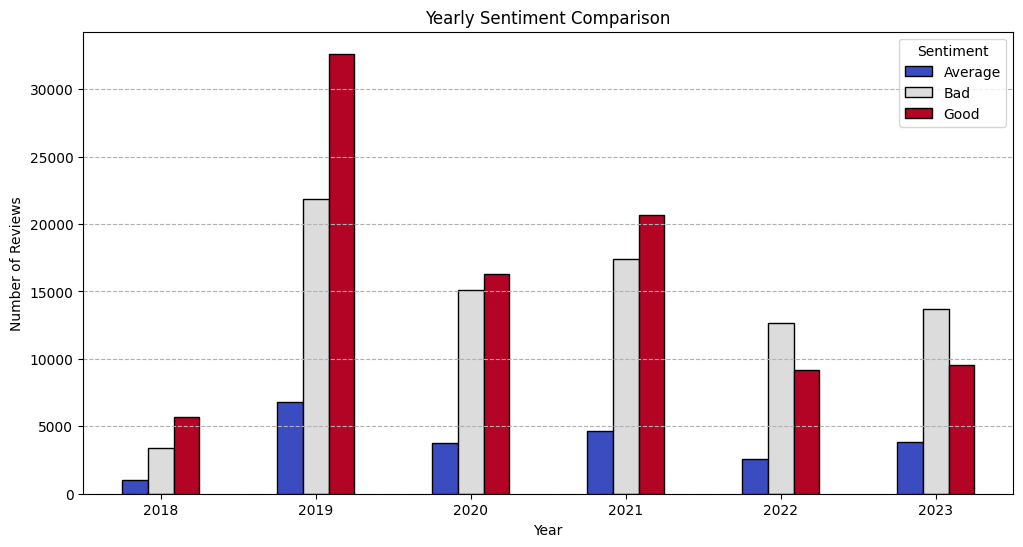

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("swiggy.csv")

# Convert review_date to datetime format
df["review_date"] = pd.to_datetime(df["review_date"], errors="coerce")

# Extract Year
df["Year"] = df["review_date"].dt.year

# Download VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    if pd.isna(text):  # Handle missing values
        return "Average"  # Neutral = Average

    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Good"  # Positive
    elif score <= -0.05:
        return "Bad"  # Negative
    else:
        return "Average"  # Neutral

# Apply sentiment analysis
df["Sentiment"] = df["review_description"].apply(get_sentiment)

# Group sentiment counts by year
sentiment_yearly = df.groupby(["Year", "Sentiment"]).size().unstack()

# Display yearly sentiment counts
print("\n📅 Sentiment Distribution by Year")
print(sentiment_yearly)

# ----- PRINT SENTIMENT COUNTS WITH BIG EMOJIS -----
print("\n📊 Sentiment Count by Year:")
for year in sentiment_yearly.index:
    print(f"\n📅 {year}")
    print("😃  Good Reviews:".ljust(20), sentiment_yearly.loc[year, "Good"])
    print("😐  Average Reviews:".ljust(20), sentiment_yearly.loc[year, "Average"])
    print("😡  Bad Reviews:".ljust(20), sentiment_yearly.loc[year, "Bad"])

# ----- BAR GRAPH -----
sentiment_yearly.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", edgecolor="black")

plt.title("Yearly Sentiment Comparison")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.grid(axis="y", linestyle="--")
plt.xticks(rotation=0)  # Keep year labels horizontal

plt.show()
